<h1 style = 'font-family:verdana'><center>DEVELOPMENT OF A MACHINE LEARNING MODEL TO ESTIMATE THE CREDIT WORTHINESS OF LOAN APPLICANTS</center></h1>

<h2  style = 'font-family:verdana'><center>JOSEPH SEGBEFIA (B1011628)</center></h2>
<h3  style = 'font-family:verdana'><center>GISMA Business School</center></h3>
<h4  style = 'font-family:verdana'> <center>MSc. Business Intelligence and Analytics</center></h4>

<h4  style = 'font-family:verdana'><center>Predictive Analytics</center></h4>

<p style = 'font-family:verdana'>Problem Statement: A payday loan company used human experts to assess the credit risk of 988 credit applications. The aim is to use this input to create a system that would estimate the credit risk of new applications.

<h3 style = 'font-family:verdana'>ABSTRACT</h3>
<p style = 'font-family:verdana'>The objective of this project is to develop a machine learning model to help estimate or predict the credit worthiness of loan applicants. The estimation/prediction will be done by looking at some information (features) on each applicant. This is a case of supervised machine learning technique called classification, where the algorithm is first trained on features of each applicant, and used to classify new applicants as 'worthy' or 'not worthy' for a loan.</p>

<h3 style = 'font-family:verdana'>INTRODUCTION</h3>
<p style = 'font-family:verdana'>In recent times, most industries are on the path of digital transformation and machine learning is at the center of this revolution. Institutions like banks, loan companies, e-commerce companies and hospitals usually employ machine learning to make their work easier. Of all the industries on the path of digital transformation, financial institutions, like loan companies and banks are at the top of the list of those that can benefit the most. Loan companies for example use machine learning which helps them become more agile, and also gives them the ability to process loans faster and more accurately. 
</p>
<p style = 'color:red'>Remember to complete this section </p>

<h3 style = 'font-family:verdana'>METHODOLOGY</h3>
<p style = 'color:red'>Remember to complete this section </p>

<h4 style = 'font-family:verdana'> The Data and Exploratory Data Analysis</h4>

In [1]:
#IMPORTING LIBRARIES AND DEPENDENCIES
#Import dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Statistics
from scipy.stats import iqr

#Associations and Hypothesis testing
from scipy.stats import ttest_ind #for perfoming two-sample t-tests

In [2]:
#Loading the data into a pandas dataframe called data
data = pd.read_excel('./Datasets/data.xlsx')

print('The dataframe has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataframe has 988 rows and 22 columns


<h4 style = 'font-family:verdana'>The Data</h4>
<p style = 'font-family:verdana'> The dataset is made up of 988 rows. This means that it contains information on 988 loan applicants, where each row represents one applicant. In addition to the number of rows, it has twenty-two (22) columns (features). The features or columns include; 'foreignworker', 'status', 'credithistory', 'purpose', and 'savings' just to name a few. Among these features, is the target variable (the variable the machine learning model predicts) is the creditworthy column. In order for the machine learning model to predict the credit worthiness of future applicants, it must be first trained using the other features. The data types of the features in the dataset are: 'string' which is usually represnted as 'object' and 'numeric' usually represented as an 'integer (int64)' or a 'float (float64)'. The cell below shows the datatype and the non-null value counts for each column. As can be seen, the data contains no values.</p>
<p style = 'color:red'>Review this section</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   foreignworker             988 non-null    object 
 1   status                    988 non-null    object 
 2   credithistory             988 non-null    object 
 3   purpose                   988 non-null    object 
 4   savings                   988 non-null    object 
 5   employmentsince           988 non-null    object 
 6   otherdebtors              988 non-null    object 
 7   property                  988 non-null    object 
 8   otherinstallments         988 non-null    object 
 9   housing                   988 non-null    object 
 10  job                       988 non-null    object 
 11  phone                     988 non-null    object 
 12  duration                  988 non-null    int64  
 13  creditamount              988 non-null    int64  
 14  installmen

<h4 style = 'font-family:verdana'>Exploratory Data Analysis</h4>
<p style = 'font-family:verdana'> Exploratory Data Analysis (EDA) is usually on of the first things a data scientist or data analyst does to the data. The main purpose of performing Exploratory Data Analysis is to help the data scientist have a look at the data he has before making any assumptions. It helps to identify obvious errors and also to identify and understand patterns within the data, detect outliers and also to find relationships and associations between variables. In the next few cells, exploratory data analysis will be performed on the dataset to help bring out hidden information in the data before a machine learning model can be fitted. Some of the quantitative columns in the data have outliers that will affect the analysis to be conducted and the machine learning model that will be built later. In order to avoid these problems, all outliers will be removed from the dataset.</p>

  foreignworker    status      credithistory           purpose  \
0           yes  < 0 Euro  critical account/  radio/television   

                       savings employmentsince otherdebtors     property  \
0  unknown/ no savings account   .. >= 7 years         none  real estate   

  otherinstallments housing  ... duration creditamount  installmentrate  \
0              none     own  ...        6         1169                4   

   residencesince  age  numberofexsistingcredits  numberofliablepeople  \
0               4   67                         2                     1   

   gender  creditworthy creditamout_per_month  
0    male        Worthy            194.833333  

[1 rows x 22 columns]

The youngest applicant is 19 years
The oldest applicant is 75 years
The average age of an applicant is 35.46 years



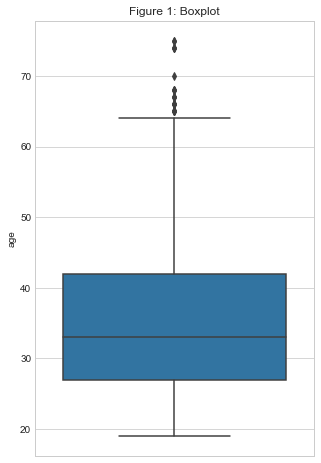

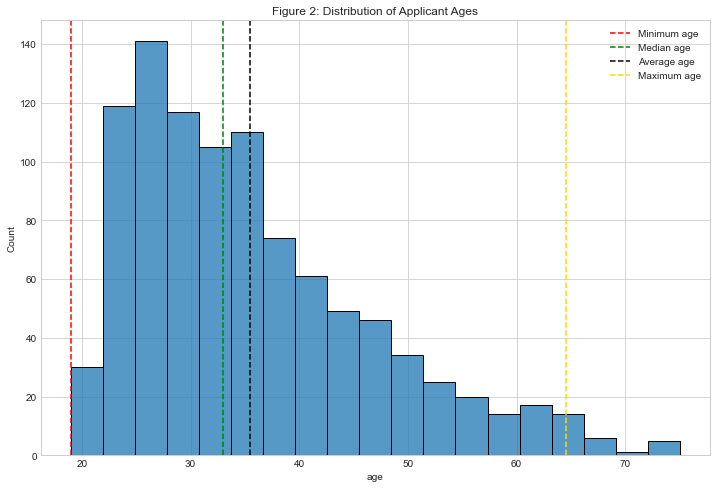

In [4]:
#Performing Exploratory Data Analysis
print(data.head(1)) #Printing the first row of the dataframe
print('')

#Extracting the ages of the loan applicants into a variable called ages
ages = data['age']
print('The youngest applicant is {} years'.format(np.min(ages)))
print('The oldest applicant is {} years'.format(np.max(ages)))
print('The average age of an applicant is {:.2f} years'.format(np.mean(ages)))
print('')

#Making a boxplot of the ages to reflect the median age, minimum age, maximum age, and any outliers present in the age
#column
plt.figure(figsize = (5, 8))
sns.boxplot(y = ages)
plt.title('Figure 1: Boxplot')
plt.show()
print('')


interquartile_range = iqr(ages)
third_quartile = np.quantile(ages, 0.75)
upper_extreme = third_quartile + (1.5 * interquartile_range)


#Making a histogram of the ages
plt.figure(figsize = (12, 8))
plt.title('Figure 2: Distribution of Applicant Ages')
sns.histplot(ages)
plt.axvline(np.min(ages), color = 'red', linestyle = 'dashed', label = 'Minimum age')
plt.axvline(np.median(ages), color = 'green', linestyle = 'dashed', label = 'Median age')
plt.axvline(np.mean(ages), color = 'black', linestyle = 'dashed', label = 'Average age')
plt.axvline(upper_extreme, color = 'gold', linestyle = 'dashed', label = 'Maximum age')
plt.legend()
plt.show()



<h5 style = 'font-family:verdana'>Applicant Ages</h5>
<p style = 'font-family:verdana'>Taking a look at the ages of the applicants in the dataset shows majority of the applicants are between 20 to 40 years as shown in the histogram (Figure 2) above. The youngest applicant is nineteen years, the oldest applicant is 75 years. The average age of the applicants is also around 35 years. This goes to show that applicants for loans as recorded in the dataset are mostly young. From the boxplot above (Figure 1), it can be observed that the there are unusually old applicants in the dataset. These applicant age group fall above the normal range of ages captured in the dataset. These age values are referred to as outliers because they differ from the normal occurrence in the dataset. From the histogram diagram above, values on the right hand side of the yellow dashed vertical line constitute the outliers. The histogram shows that the ages of the applicants are not normally distributed as majority of the ages fall to the left of the plot. This is because the mean is greater than the median causing the distribution to be skewed to the right.</p>

<h5 style = 'font-family:verdana'>Exploring Outliers</h5>
<p style = 'font-family:verdana'>When data is represented using a box and whisker plot, the outliers in the dataset are the points in the dataset that fall outside of the whiskers of the boxplot. Outliers are usually represented with a dot or an asterisk. It is an observation or data point that resides at an abnormal distance (more than 3 standard deviations from the sample mean) from other values in the sample. Outliers have the tendency of increasing the variability in a sample, which decreases statistical power. So, removing them can cause results to become statistically significant. Present in the given data are outliers in almost all the quantitative columns. Columns with outliers include, 'duration', 'creditamount', 'age', and others as shown by the boxplots below.</p>
<p style = 'font-family:verdana'>The column called numberofliablepeople only contains two unique values i.e 1, 2. So it was recoded as a categorical variable instead of a quantitative one.</p>

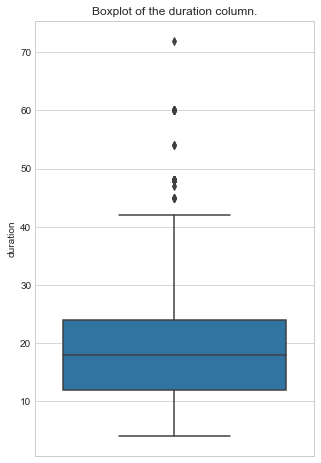

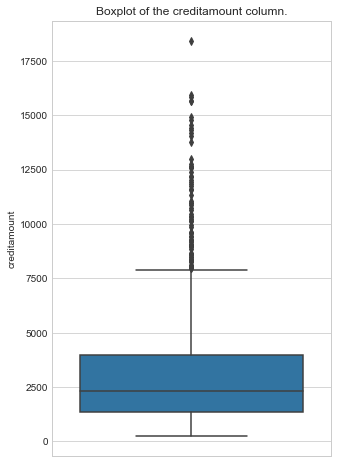

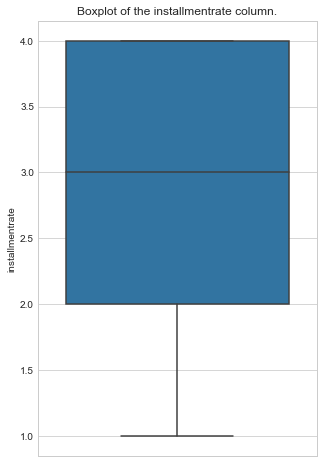

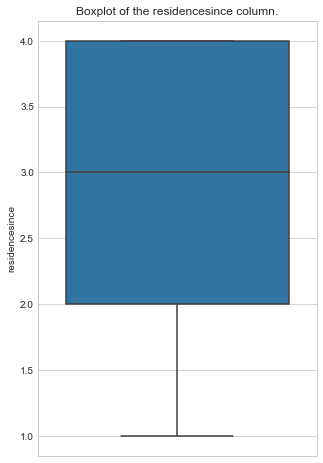

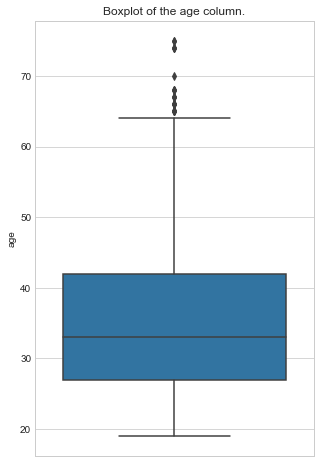

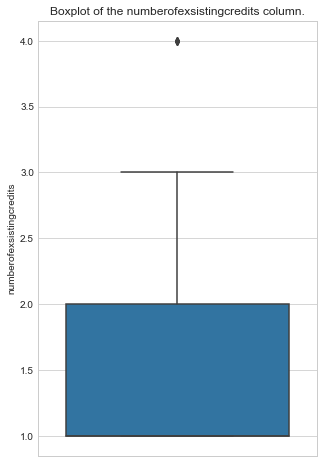

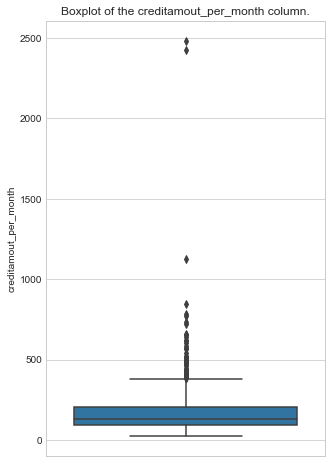

In [5]:
#Recoding the 'numberofliablepeople' column as a categorical variable
data['numberofliablepeople'] = pd.Categorical(data['numberofliablepeople'])

#Creating a function to detect outliers in all the quantitative columns in the data using a box and whisker plot
def outlier_detector(data):
    for col in data.columns:
        if data[col].dtypes == 'int' or data[col].dtypes == 'float':
            plt.figure(figsize = (5, 8))
            sns.boxplot(y = data[col])
            plt.title('Boxplot of the {} column.'.format(col))
            plt.show()

outlier_detector(data)


#A for loop to remove all outliers in the quantitative columns
for col in data.columns:
    if data[col].dtypes == 'int' or data[col].dtypes == 'float':
        interquartile_range = iqr(data[col])
        third_quartile = np.quantile(data[col], 0.75)
        upper_extreme = third_quartile + (1.5 * interquartile_range)
        data.drop(data[data[col] > upper_extreme].index, inplace = True)

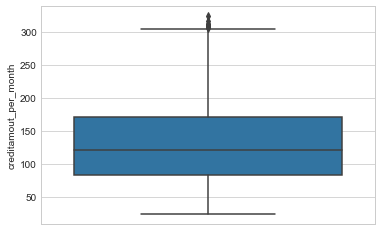

In [6]:
sns.boxplot(y = data['creditamout_per_month'])
plt.show()

There are a total of 521 male applicants in the data
There are a total of 252 female applicants in the data

Proportions:
male      0.673997
female    0.326003
Name: gender, dtype: float64

Number of worthy male applicants: 391
Number of unworthy male applicants: 130

Number of worthy female applicants: 170
Number of unworthy female applicants: 82


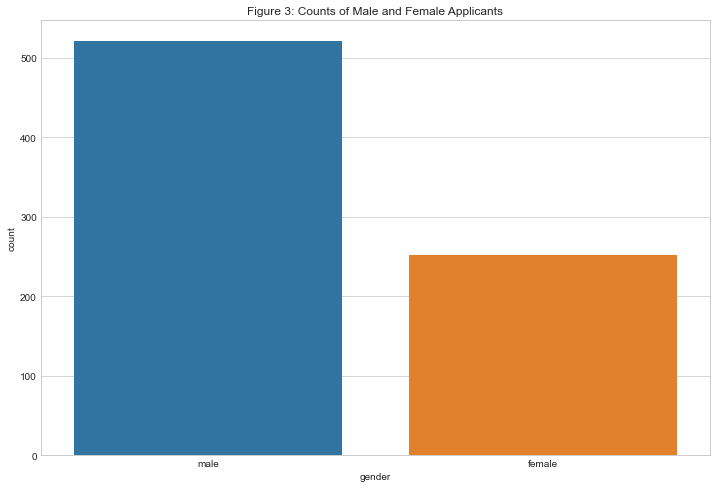

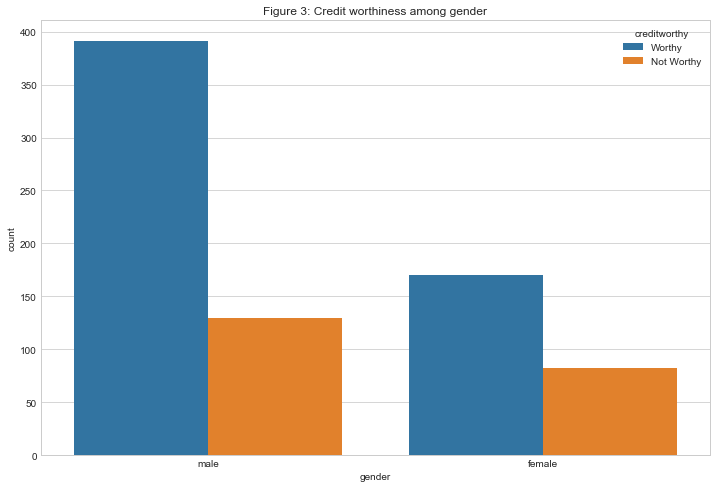

In [7]:
#Investigating the gender of applicants

#Finding the number of male and female applicants
male = data[data['gender'] == 'male']
female = data[data['gender'] == 'female']

print('There are a total of {} male applicants in the data'.format(len(male)))
print('There are a total of {} female applicants in the data'.format(len(female)))
print('')

#Proportions of male and female applicants
proportions = data['gender'].value_counts(normalize = True)
print('Proportions:')
print(proportions)
print('')

#Credit worthiness among the gender
male_worthy = male[male['creditworthy'] == 'Worthy']
male_unworthy = male[male['creditworthy'] == 'Not Worthy']

female_worthy = female[female['creditworthy'] == 'Worthy']
female_unworthy = female[female['creditworthy'] == 'Not Worthy']

print('Number of worthy male applicants: {}'.format(len(male_worthy)))
print('Number of unworthy male applicants: {}'.format(len(male_unworthy)))
print('')
print('Number of worthy female applicants: {}'.format(len(female_worthy)))
print('Number of unworthy female applicants: {}'.format(len(female_unworthy)))


#Visualizing the number of male and female applicants
plt.figure(figsize = (12, 8))
sns.countplot(x= data['gender'])
plt.title('Figure 3: Counts of Male and Female Applicants')
plt.show()
print('')

#Visualizing the number of male and female applicants found to be credit worthy or not
plt.figure(figsize = (12, 8))
sns.countplot(x = 'gender', hue = 'creditworthy', data = data)
plt.title('Figure 3: Credit worthiness among gender')
plt.show()

<h5 style = 'font-family:verdana'>Gender of Applicants</h5>
<p style = 'font-family:verdana'>The data was gathered on 988 loan applicants of which 683 are male making about 70% of the total number. The number of female applicants is 305 making up 30% of the data. The credit worthiness of applicants according to their gender shows that more male applicants were found to be credit worthy as compared to the females. This could be due the fact the there are more males in the dataset to begin with. But will that still be case when given a larger sample size where the number of males and females applicants are similar? This question could be answered using a hypothesis test.</p>

Number of worthy applicants: 561
Number of unworthy applicants: 212



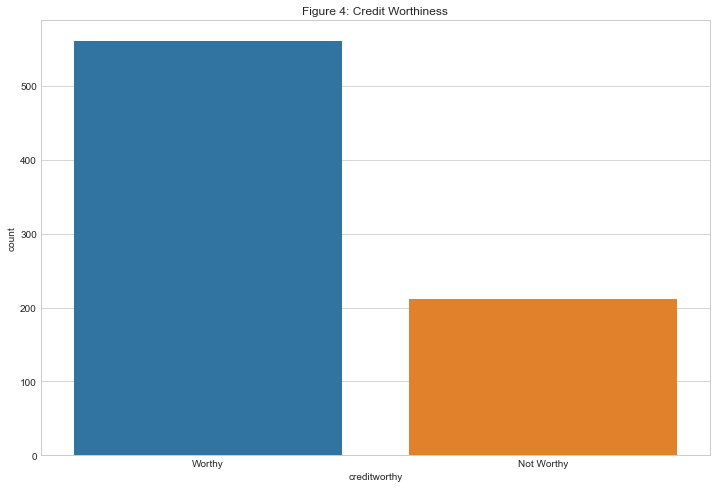

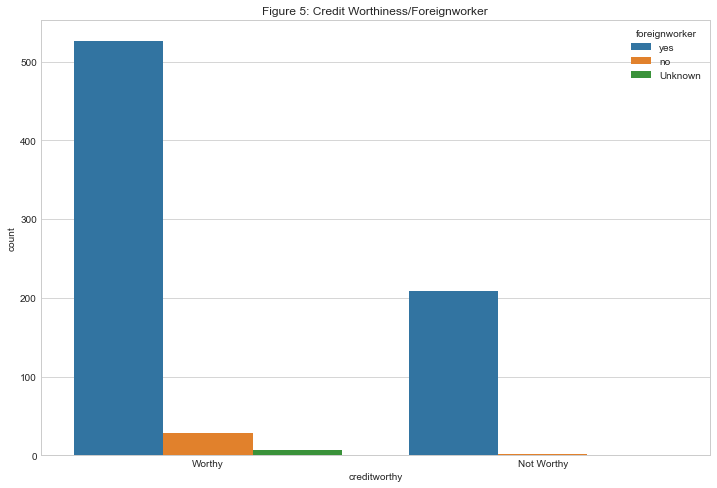


purpose       business  car (new)  car (used)  domestic appliances  education  \
creditworthy                                                                    
Not Worthy          17         68           2                    3         18   
Worthy              51        104          59                    8         21   

purpose       furniture/equipment  others  radio/television  repairs  \
creditworthy                                                           
Not Worthy                     47       1                48        7   
Worthy                        112       4               184       10   

purpose       retraining  
creditworthy              
Not Worthy             1  
Worthy                 8  


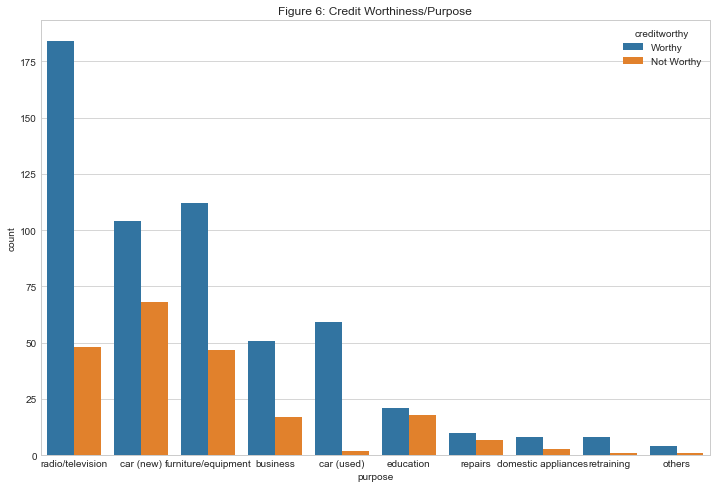

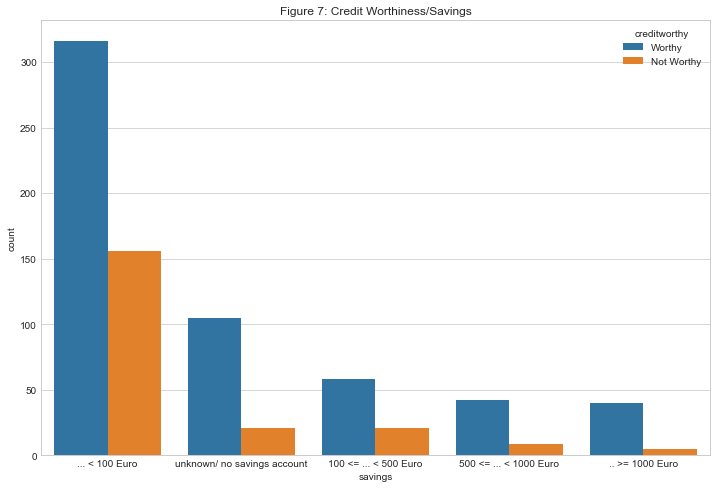

radio/television       232
car (new)              172
furniture/equipment    159
business                68
car (used)              61
education               39
repairs                 17
domestic appliances     11
retraining               9
others                   5
Name: purpose, dtype: int64

In [8]:
#Looking at the credit worthiness column

#Number of credit worthy applicants
worthy = data[data['creditworthy'] == 'Worthy']
unworthy = data[data['creditworthy'] == 'Not Worthy']

print('Number of worthy applicants: {}'.format(len(worthy)))
print('Number of unworthy applicants: {}'.format(len(unworthy)))
print('')

#Visualizing credit worthiness
plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', data = data)
plt.title('Figure 4: Credit Worthiness')
plt.show()
print('')

plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', hue = 'foreignworker', data = data)
plt.title('Figure 5: Credit Worthiness/Foreignworker')
plt.show()
print('')

#Contigency Table to find the purposes for which credit was given often
purpose_crosstab = pd.crosstab(data['creditworthy'], data['purpose'])
print(purpose_crosstab)

#Creditworthy/Purpose
plt.figure(figsize = (12, 8))
sns.countplot(x = 'purpose', hue = 'creditworthy', data = data, order = data['purpose'].value_counts().index)
plt.title('Figure 6: Credit Worthiness/Purpose')
plt.show()
print('')


#Credit worthy/Savings
plt.figure(figsize = (12, 8))
sns.countplot(x = 'savings', hue = 'creditworthy', data = data, order = data['savings'].value_counts().index)
plt.title('Figure 7: Credit Worthiness/Savings')
plt.show()

data['purpose'].value_counts()

<h5 style = 'font-family:verdana'>Credit Worthiness of Applicants</h5>
<p style = 'font-family:verdana'>The 'creditworthy' column in the dataframe gives information on which applicant is credit worthy or not worthy, depending on the combination of the other features. This is the column that a machine learning model will try to predict. From the data, it is observed that 691 of the applicants were found to be credit worthy while 297 were not worthy.</p>
    
<p style = 'font-family:verdana'>From the dataset, it is observed that a larger number of foreign workers were found to be more credit worthy as compared to non-foreign workers. Again, examining the purposes of the loans revealed some interesting insights from the data. One would have thought that loans or credits for education and business will be approved more, but the information in the dataset shows otherwise. It is seen that, loans for the purpose of 'television/radio' were leading in approvals, followed by loans for new cars, furniture/equipment and so on as shown in Figure 6.</p>
    
<p style = 'font-family:verdana'>Examining, the savings column against the creditworthy column shows that applicants with savings less than 100 euros and had their loans approved have a higher representation in the dataset among other savings amount approvals. Applicants again with savings less than 100 euros have a higher representation when it comes to disapprovals as well as shown in figure 7 above.</p>
    
<p style = 'font-family:verdana'>But then again, all these findings may be only peculiar to this sample and may not reflect the same findings should the sample size be increased. To find out if these findings are actually true, hypothesis testing techniques can be employed to quantify these uncertainties and conclude on what could be if more data could be collected.</p>

<p style = 'font-family:verdana'>From this 'mini' Exploratory Data Analysis conducted, very insightful information has been uncovered and paves the way for further analysis and model building.</p>

<h4 style = 'font-family:verdana'>Feature Selection</h4>
<p style = 'font-family:verdana'>In data science and machine learning, feature importance recognizes which features also referred to as columns or inputs in the dataset have the greatest effect on the outcomes of a machine learning model. Machine learning algorithms focus on different features in a dataset, depending on their properties. For example, features with strong linear trends have great impacts in linear algorithms like regression, while the nonlinear-based methods will make use of the more complex relationships in the data. Various techniques are applied by data scientists to investigate which features are meaningful to improving the accuracy and applicability of the models that they build.</p>
<p style = 'font-family:verdana'>It is important to know which features in the dataset impact the outcome of the model because it helps data scientists and business professionals to focus on the features that matter most, saving time and resources. For example, if an organisation pays for data to use in machine learning and AI projects from a third party company, but feature importance analysis indicates that none of the features are useful, then it saves the company money and time.</p>


<h4 style = 'font-family:verdana'>Most Important Determinants of Credit Risk</h4>
<p style = 'font-family:verdana'>Feature selection is one of the most important concepts in machine learning which highly impacts the performance of the machine learning model.Here, the available data will be analysed to extract the most important features, as irrelevant or partially relevant features will have a negative impact on the performance of the model. The model will be negatively impacted because, it will learn based on irrelevant features. Feature selection will be done on the data because:</p>
<ol>
    <li><p style = 'font-family:verdana'>It will help to reduce overfitting</p></li>
    <li><p style = 'font-family:verdana'>It will increase the accuracy of the model</p></li>
    <li><p style = 'font-family:verdana'>It will reduce training time</p></li>
</ol>
<p style = 'font-family:verdana'>With the credit data available, and before building a machine learning model to predict the credit worthiness of new applicants, the data scientist can use various techiniques to select which features have the most impact on the predicted values of the model. Features can selected from the data by investigating the various associations between each individual feature and the target feature, which in this case is the 'creditworthy' column.Examining the associations between variables helps the data scientist to know more about a feature given information about another. For example, in the credit data given, does knowing the gender of an applicant give us information on whether he/she was found to be credit worthy or not? Another example, does the age of an applicant determine his/her chances of being found to be credit worthy or not? These questions can be answered using various statistical methods based on the type of data being dealt with. Answers to questions like the ones previously asked will provide insight on which features are important to the model and those that are not.</p>

<h5 style = 'font-family:verdana'>Associations Between Features</h5>
<p style = 'font-family:verdana'>The statistical tests that will be used here will include:</p>
<ol>
    <li><p style = 'font-family:verdana'>Two-Sample t-test for testing the association between a binary categorical (variable that groups items into 2 distinct categories) variable and a quantitative variable. For example, the association between the age (quantitative variable) column and the creditworthy (binary categorical variable) column </p></li>.
    <li><p style = 'font-family:verdana'>Chi-Square Test for testing the association between a binary categorical variable and a categorical variable or an association between a categorical variable with 3 or more categories and a categorical variable. For example, the association between the purpose (categorical variable with 3 or categories) column with and the creditworthy column (binary categorical variable).</p></li>
</ol>
<p style = 'font-family:verdana'>There are other statistical tests like, one sample t-test, binomial test and ANOVA with Tukey's Range Test that can be used to examine associations between variables. These other tests do not apply to the credit data because the variable present in the data are quantitative (variables that be quantified with a number), non-binary categorical (categorical variable with more than 2 categories) data and these are being compared with a binary categorical variable (creditworthy column).</p>
<p style = 'font-family:verdana'>For testing the association between a binary categorical variable and a quantitative variable, the quantitave variable can be grouped into the respective categories of the categorical variable and the mean and median differences found for the groups. Highly associated associated variables tend to have large mean and median differences. It is usually difficult to know what to call a 'large' or 'small' mean or median difference, but side-by-side boxplots can be helpful in visualizing the mean and median differences and also give the chance to visually estimate the variation in the data. This can help to determine if mean and median differences are 'large' or 'small'.</p>


<h5 style = 'font-family:verdana'>Two Sample T-Test</h5>
<p style = 'font-family:verdana'>A two sample t-test is used to investigate an association between a quantitative variable and a binary categorical variable. For example, suppose the association between ages (quantitative) of the applicants is to be tested to see if there is an association with and credit worthiness: 'Worthy' and 'Not Worthy' (binary categorical). To answer this question, a sample selection of the ages of worthy applicants and not worthy applicants could be made and then the average age is calculated for each group. Then, the two-sample t-test can be used to determine the probability that the ages for these two groups are significantly different. Should there be a significant difference in these two groups,then an association between the ages of the applicants and credit worthiness is established and it will go on to prove that applicant ages is an important feature to determine credit worthiness. In the case where there is no significant difference, then there is no association and the ages of applicants do not determine their credit worthiness.</p>
<p style = 'font-family:verdana'>From the credit data provided, the features that are quantitative and can be compared to the creditworthy column using the two sample t-test include: duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits', 'numberofliablepeople', 'creditamout_per_month'.</p>

In [9]:
quantitative_var = []
for i in data.columns:
    if data[i].dtype == 'int' or data[i].dtype == 'float':
        quantitative_var.append(i)
print(quantitative_var)



def association_finder(var, data):
    """A function to determine the associations between the quantitative variables 
        and the binary categorical variable 'creditworthy'"""
    
    #Creating groups of worthy and unworthy applicants based on a particular feature
    worthy = data[data['creditworthy'] == 'Worthy'][var]
    unworthy = data[data['creditworthy'] == 'Not Worthy'][var]
    
    #Finding the means and medians of the groups
    mean_worthy = np.mean(worthy)
    median_worthy = np.median(worthy)
    mean_unworthy = np.mean(unworthy)
    median_unworthy = np.median(unworthy)
    
    #Calculating the mean and median differences
    mean_diff = abs(mean_worthy - mean_unworthy)
    median_diff = abs(median_worthy - median_unworthy)
    print('The mean difference between {} and creditworthy column is {}'.format(var, mean_diff))
    print('The median difference between {} and the creditworthy column is {}'.format(var, median_diff))
    
    #Plotting overlapping histograms
    plt.hist(worthy, color = 'red', label = 'Worthy', density = True, alpha = 0.5)
    plt.hist(unworthy, color = 'blue', label = 'Not Worthy', density = True, alpha = 0.5)
    plt.legend()
    plt.show()
    
    #Plotting the boxplots to visualize the difference
    sns.boxplot(data = data, x = 'creditworthy', y = var)
    plt.show()
    
    #Using the two-sample t-test to prove an association
    tstat, pval = ttest_ind(worthy, unworthy)
    return pval
    
    
    

['duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits', 'creditamout_per_month']


The mean difference between age and creditworthy column is 2.338563212592071
The median difference between age and the creditworthy column is 3.0


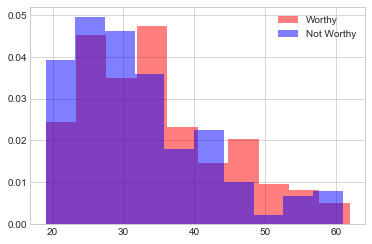

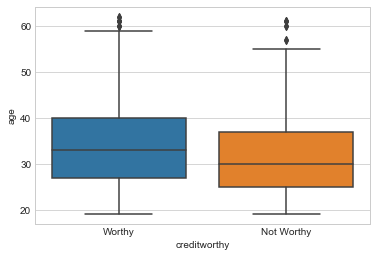

0.0030921154636886204

In [10]:
association_finder('age', data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 2 to 985
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   foreignworker             773 non-null    object  
 1   status                    773 non-null    object  
 2   credithistory             773 non-null    object  
 3   purpose                   773 non-null    object  
 4   savings                   773 non-null    object  
 5   employmentsince           773 non-null    object  
 6   otherdebtors              773 non-null    object  
 7   property                  773 non-null    object  
 8   otherinstallments         773 non-null    object  
 9   housing                   773 non-null    object  
 10  job                       773 non-null    object  
 11  phone                     773 non-null    object  
 12  duration                  773 non-null    int64   
 13  creditamount              773 non-null    int64   

In [12]:
data.columns

Index(['foreignworker', 'status', 'credithistory', 'purpose', 'savings',
       'employmentsince', 'otherdebtors', 'property', 'otherinstallments',
       'housing', 'job', 'phone', 'duration', 'creditamount',
       'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits',
       'numberofliablepeople', 'gender', 'creditworthy',
       'creditamout_per_month'],
      dtype='object')

In [13]:
data['numberofliablepeople']

2      2
4      2
6      1
7      1
8      1
      ..
981    1
982    1
983    1
984    1
985    1
Name: numberofliablepeople, Length: 773, dtype: category
Categories (2, int64): [1, 2]

In [14]:
crosstab = pd.crosstab(data['foreignworker'], data['creditworthy'])
print(crosstab)

creditworthy   Not Worthy  Worthy
foreignworker                    
Unknown                 1       7
no                      2      28
yes                   209     526


In [15]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(crosstab)
print(expected)

[[  2.19404916   5.80595084]
 [  8.22768435  21.77231565]
 [201.57826649 533.42173351]]


In [16]:
print(chi2)

7.767106246443688


In [17]:
print(pval)

0.020577580456034642


In [18]:
crosstab = pd.crosstab(data['savings'], data['creditworthy'])
print(crosstab)

creditworthy                 Not Worthy  Worthy
savings                                        
.. >= 1000 Euro                       5      40
... < 100 Euro                      156     316
100 <= ... < 500 Euro                21      58
500 <= ... < 1000 Euro                9      42
unknown/ no savings account          21     105


In [19]:
chi2, pval, dof, expected = chi2_contingency(crosstab)
print(expected)

[[ 12.34152652  32.65847348]
 [129.44890039 342.55109961]
 [ 21.66623545  57.33376455]
 [ 13.98706339  37.01293661]
 [ 34.55627426  91.44372574]]


In [20]:
print(pval)

0.00010891064884911856


In [21]:
print(chi2)

23.327448598262976


In [22]:
round(np.sqrt(988))

31

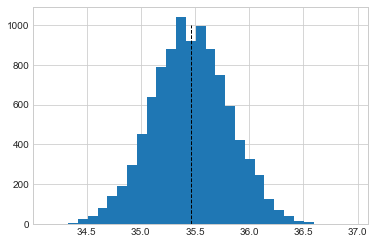

In [23]:
import random

sample_means = []
for i in range(10000):
    samp = random.sample(list(ages), 500)
    sample_means.append(np.mean(samp))
plt.hist(sample_means, bins = 31)
plt.vlines(np.mean(sample_means), 0, 1000, lw = 1, linestyles = 'dashed', color = 'black')
plt.show()
    

In [24]:
np.percentile(sample_means, [2.5, 97.5])

array([34.754, 36.154])

In [25]:
data['creditworthy'].unique()

array(['Worthy', 'Not Worthy'], dtype=object)

In [26]:
data.drop(data[data['age'] > upper_extreme].index, inplace = True)

In [27]:
data['age'].max()

62

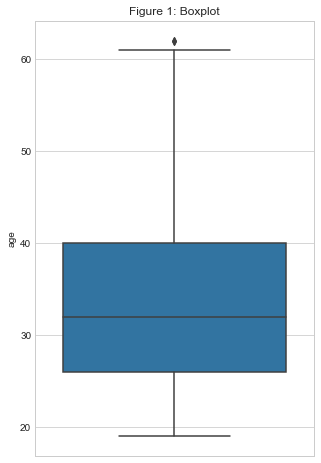

In [28]:
plt.figure(figsize = (5, 8))
sns.boxplot(y = data['age'])
plt.title('Figure 1: Boxplot')
plt.show()
print('')

The mean difference between age and creditworthy column is 2.338563212592071
The median difference between age and the creditworthy column is 3.0


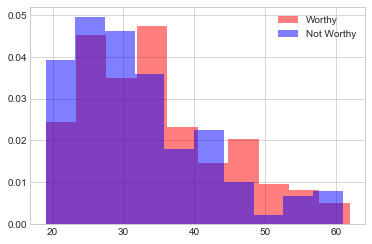

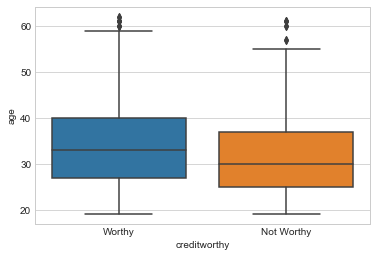

0.0030921154636886204

In [29]:
association_finder('age', data)

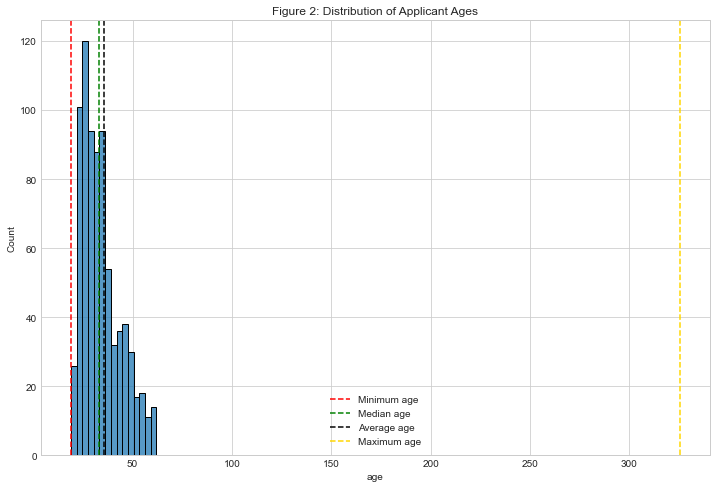

In [30]:
#Making a histogram of the ages
plt.figure(figsize = (12, 8))
plt.title('Figure 2: Distribution of Applicant Ages')
sns.histplot(data['age'])
plt.axvline(np.min(ages), color = 'red', linestyle = 'dashed', label = 'Minimum age')
plt.axvline(np.median(ages), color = 'green', linestyle = 'dashed', label = 'Median age')
plt.axvline(np.mean(ages), color = 'black', linestyle = 'dashed', label = 'Average age')
plt.axvline(upper_extreme, color = 'gold', linestyle = 'dashed', label = 'Maximum age')
plt.legend()
plt.show()

In [ ]:
val  = int(input('What is your salary:'))